##  Computing Nseries Exercise: 

Let's use all the scaffolds contained in plant_contaminants.fa to compute the Nseries and other interesting sequence statistics for genome assemblies. 

  A - let's use all the scaffolds contained in plant_contaminants.fa to compute the Nseries and other interesting sequence statistics for genome assemblies:

    1. Write python functions to retrieve this information: N50, L50, N90,L90.
    2. Print also the maximum and minimum scaffold length.
    3. Use same functions to retrieve the whole Nseries and Lseries. Starting from ≥0% and incrementing it 5 by 5, i.e. N0,N5...until N100

B - compute now the Nseries for the Caenorhabditis afra assembly. As file is larger than 40 MB, you'll need to uncompress the .zip file provided in the Aula ESCI. Finally, examine the fasta:   

   4.1. Which assembly is longer this or the plant contaminants one?
   
   4.2. Which one includes the shortest scaffolds?
   
   4.3. Which one is more contiguous attending to the N50?
   
   4.4. Is the N50 doing a fair comparison between both assemblies? why?


In [4]:
from Bio import SeqIO

In [18]:
records = list(SeqIO.parse("plant_contaminants.fa", "fasta"))

In [62]:
sorted_records = reversed(sorted(records, key= len))

fa_overall_lens = [len(record.seq) for record in sorted_records]

fa_length = sum(fa_overall_lens)

def N_L(length, overall_lens ,percentage):
    max_length = length*percentage
    suma = 0
    for max_pos in range(len(overall_lens)):
        suma += overall_lens[max_pos]
        if suma >= max_length:
            return overall_lens[max_pos],max_pos+1

result50 = N_L(fa_length, fa_overall_lens, 0.50)
print(f'N50: {result50[0]}\nL50: {result50[1]}')

result90 = N_L(fa_length, fa_overall_lens, 0.90)
print(f'N90: {result90[0]}\nL90: {result90[1]}')

N50: 596352
L50: 13
N90: 328634
L90: 26


In [53]:
max = fa_overall_lens[0]
min = fa_overall_lens[len(fa_overall_lens)-1]

print(max,'//', min)

745751 // 2595


In [65]:
for per in range(5,105,5):
    result = N_L(fa_length, fa_overall_lens, per/100)
    print(f' For {per} we have N{per} = {result[0]} and L{per} = {result[1]}\n')

 For 5 we have N5 = 742537 and L5 = 2

 For 10 we have N10 = 739748 and L10 = 3

 For 15 we have N15 = 716602 and L15 = 4

 For 20 we have N20 = 714651 and L20 = 5

 For 25 we have N25 = 702208 and L25 = 6

 For 30 we have N30 = 675346 and L30 = 8

 For 35 we have N35 = 666816 and L35 = 9

 For 40 we have N40 = 654595 and L40 = 10

 For 45 we have N45 = 629517 and L45 = 11

 For 50 we have N50 = 596352 and L50 = 13

 For 55 we have N55 = 582573 and L55 = 14

 For 60 we have N60 = 574960 and L60 = 16

 For 65 we have N65 = 573434 and L65 = 17

 For 70 we have N70 = 562643 and L70 = 19

 For 75 we have N75 = 516869 and L75 = 20

 For 80 we have N80 = 465823 and L80 = 22

 For 85 we have N85 = 384502 and L85 = 24

 For 90 we have N90 = 328634 and L90 = 26

 For 95 we have N95 = 270161 and L95 = 29

 For 100 we have N100 = 2595 and L100 = 36



In [66]:
records2 = list(SeqIO.parse("other.fa", "fasta"))

sorted_records2 = reversed(sorted(records2, key= len))

fa_overall_lens2 = [len(record.seq) for record in sorted_records2]

fa_length2 = sum(fa_overall_lens2)

for per in range(5,105,5):
    result = N_L(fa_length2, fa_overall_lens2, per/100)
    print(f' For {per} we have N{per} = {result[0]} and L{per} = {result[1]}\n')

 For 5 we have N5 = 17708429 and L5 = 1

 For 10 we have N10 = 17708429 and L10 = 1

 For 15 we have N15 = 17708429 and L15 = 1

 For 20 we have N20 = 17708429 and L20 = 1

 For 25 we have N25 = 17708429 and L25 = 1

 For 30 we have N30 = 12207686 and L30 = 2

 For 35 we have N35 = 12207686 and L35 = 2

 For 40 we have N40 = 12207686 and L40 = 2

 For 45 we have N45 = 10185359 and L45 = 3

 For 50 we have N50 = 10185359 and L50 = 3

 For 55 we have N55 = 10185359 and L55 = 3

 For 60 we have N60 = 9901019 and L60 = 4

 For 65 we have N65 = 9901019 and L65 = 4

 For 70 we have N70 = 9901019 and L70 = 4

 For 75 we have N75 = 9720948 and L75 = 5

 For 80 we have N80 = 9720948 and L80 = 5

 For 85 we have N85 = 9720948 and L85 = 5

 For 90 we have N90 = 9235572 and L90 = 6

 For 95 we have N95 = 9235572 and L95 = 6

 For 100 we have N100 = 14185 and L100 = 7



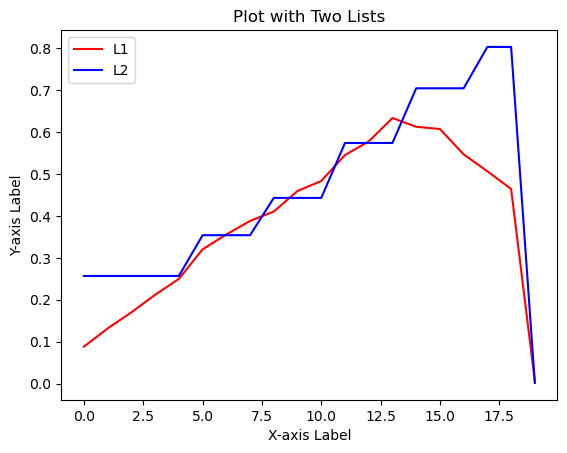

In [77]:
import matplotlib.pyplot as plt

N1 = []
L1 = []

N2 = []
L2 = []
for per in range(5,105,5):
    result = N_L(fa_length2, fa_overall_lens2, per/100)
    L2.append(result[1]*(result[0]/fa_length2))


for per in range(5,105,5):
    result = N_L(fa_length, fa_overall_lens, per/100)
    L1.append(result[1]*(result[0]/fa_length))


# Create a plot
plt.plot(L1, color = 'red', label='L1')
plt.plot(L2, color = 'blue', label='L2')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Plot with Two Lists')

# Add legend
plt.legend()

# Show the plot
plt.show()
